Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [82]:
titanic_df = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/data_for_python/train.csv')
titanic_df.columns = [column.lower() for column in titanic_df.columns]

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

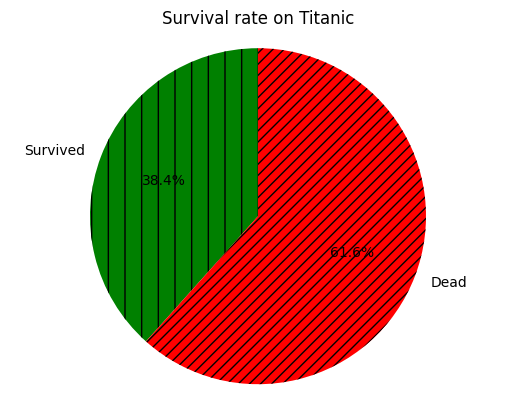

In [80]:
pie_labels = ['Survived', 'Dead']
pie_values = [0, 0]
survived_column = titanic_df[['survived']].copy()

pie_values[0] = survived_column[survived_column['survived'] == 1].count().values[0]
pie_values[1] = survived_column[survived_column['survived'] == 0].count().values[0]

survived_fig, survived_ax = plt.subplots()
survived_ax.pie(pie_values, labels=pie_labels, autopct='%.1f%%', startangle=90, colors=['green', 'red'], hatch=['|', '///'])
survived_ax.axis('equal')
plt.title('Survival rate on Titanic')

plt.show()

Візуалізація показує співвідношення у відсотках між кількістю загиблих та виживших пасажирів на Титаніку


3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


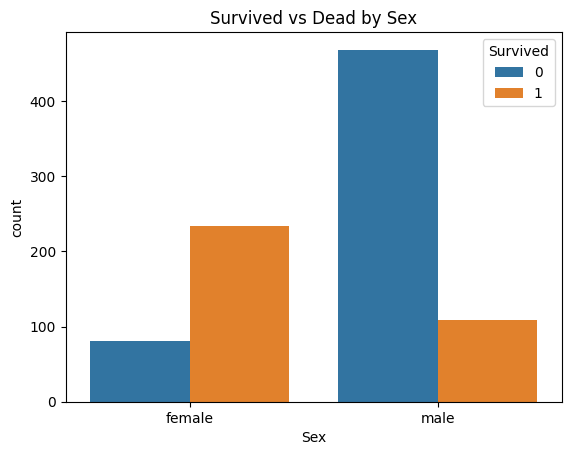

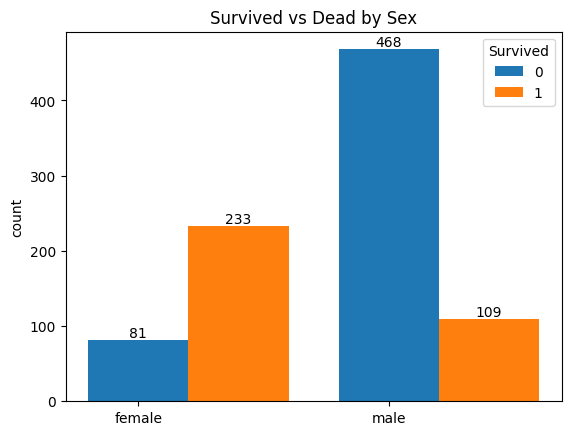

In [76]:
survived_by_sex = titanic_df[['survived', 'sex']].copy()
stats_bysex = survived_by_sex.groupby(['survived', 'sex'], as_index=False).size()
stats_bysex = stats_bysex.rename(columns={'size': 'amount'})

sex_labels = stats_bysex['sex'].unique().tolist()
dead_values = stats_bysex[stats_bysex['survived'] == 0]['amount'].tolist()
survived_values = stats_bysex[stats_bysex['survived'] == 1]['amount'].tolist()

united_values = {'0' : dead_values,
                 '1' : survived_values}

x = np.arange(len(sex_labels))

fig, ax = plt.subplots()

multiplier = 0
for attribute, measurement in united_values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects)
    multiplier += 1

ax.set_ylabel('count')
ax.set_title('Survived vs Dead by Sex')
ax.set_xticks(x + 0/8, sex_labels)
ax.legend(loc='upper right', title='Survived')

plt.show()

За допомогою візуалізації можна побачити, що смертність має пряму залежність від статі людини.За графіком видно, що більшість жінок вижила, а більшість чоловіків - ні.


4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

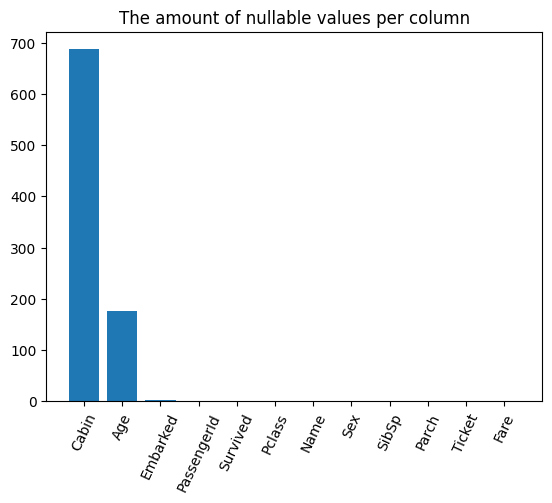

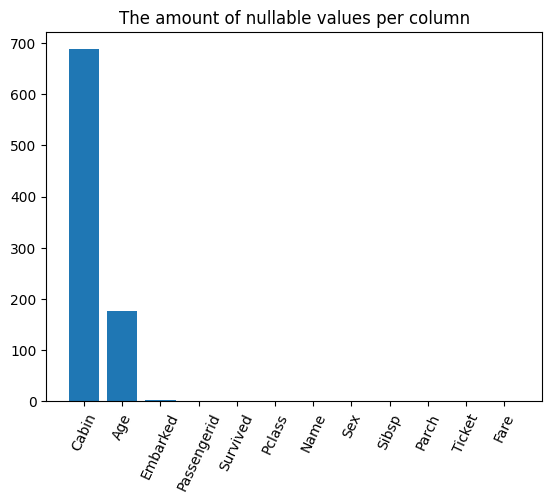

In [40]:
null_amount_bycols = len(titanic_df) - titanic_df.count()
null_amount_bycols = null_amount_bycols.sort_values(ascending=False)

column_labels = null_amount_bycols.index.array.tolist()
column_labels = [label.capitalize() for label in column_labels]

column_values = null_amount_bycols.values.tolist()

fig, ax = plt.subplots()

ax.bar(column_labels, column_values)
ax.set_title('The amount of nullable values per column')

plt.xticks(rotation=65)
plt.show()

По візуалізації можна зрозуміти, що найбільше пропущених значень спостерігається у стовпцях, що відповідають за кімнату та вік пасажирів. Це свідчить про те, що збір інформації про ці дані для кожного пасажира був дуже важким.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

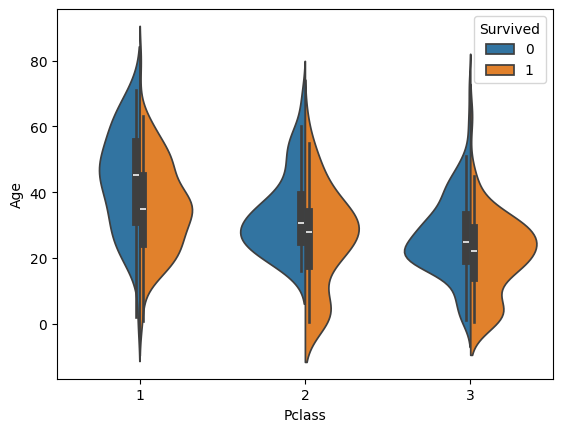

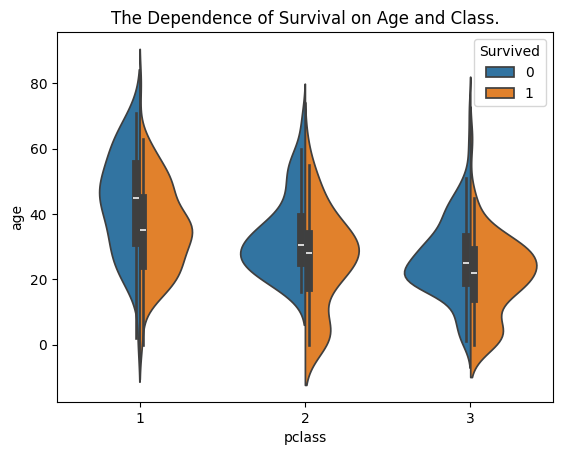

In [54]:
filtered_passengers = titanic_df[titanic_df['age'].notna()]
filtered_passengers = filtered_passengers.astype({'age': 'int64'})

sns.violinplot(data=filtered_passangers, x='pclass', y='age', hue='survived', split=True)

plt.title(label='The Dependence of Survival on Age and Class.')
plt.legend(title='Survived')
plt.show()


Графік показує залежність виживання від віку та класу пасажира. Можна побачити, що найбільша кількість людей, що вижила була від 18 до 45 приблизно, а також діти 2 та 3 класу. Також, середній вік пасажирів першого класу більший за 2 та 3. Графіки 2 та 3 класу достатньо симетричні, а на графіку 1 класу видно, що вижило менше людей віком від 40 років.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


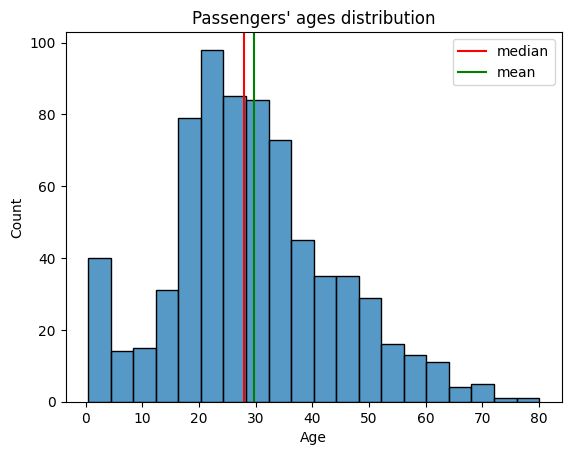

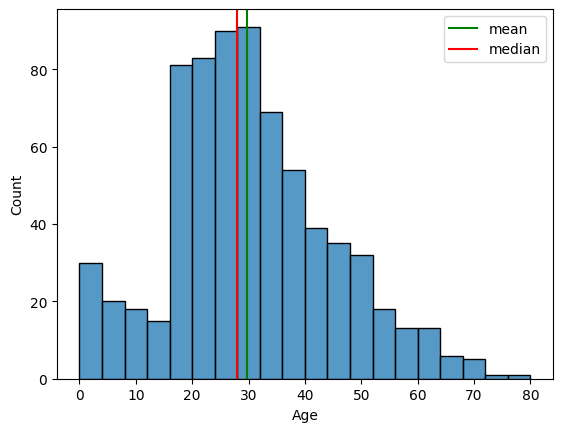

In [11]:
age_mean = filtered_passangers['age'].mean()
age_median = filtered_passangers['age'].median()

sns.histplot(data=filtered_passangers, bins=20, x='age')

plt.axvline(age_mean, color='green', label='mean')
plt.axvline(age_median, color='red', label='median')

plt.legend(loc='upper right')
plt.xlabel("Age")

plt.show()

З даного графіку можна зрозуміти, що на Титаніку було значна кількість пасажирів у віці від 18 до 40 років. Крім того, середній вік усіх пасажирів становить приблизно 29 років. Медіана, яка складає близько 27 років, свідчить про те, що кількість пасажирів молодших і старших за 27 майже однакова.


7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Чи залежить вибір класу від віку пасажира? Від його статі? Чи впливнув вибір класу(заможність) на виживання?(я розумію, що це не зовсім бізнес питання, просто стало цікаво саме з розмежуванням на статі)



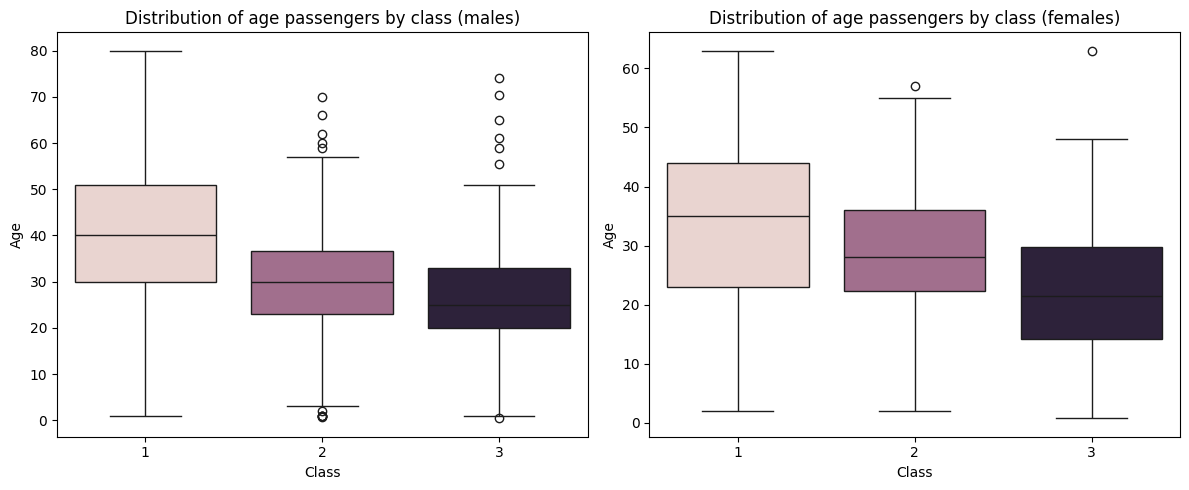

In [70]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='pclass', y='age', data=titanic_df[titanic_df['sex'] == 'male'], hue='pclass', legend=False)
plt.title('Distribution of age passengers by class (males)')
plt.xlabel('Class')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='pclass', y='age', data=titanic_df[titanic_df['sex'] == 'female'], hue='pclass', legend=False)
plt.title('Distribution of age passengers by class (females)')
plt.xlabel('Class')
plt.ylabel('Age')

plt.tight_layout()
plt.show()


З даного графіку видно, що статистично старші люди беруть квитки вищого класу частіше, і ці грані чітко видно на графіку. Виколоті точки позначають виключення, які можуть псувати середнє значення, так, наприклад, серед чоловіків таких виключень більше, ніж серед жінок. Також по графіку видно, що жінки при меншому віці мають цей самий перехід у наступний клас, думаю це може бути пов'язане саме з тим, що чоловік і жінка зазвичай беруть квитки разом, і чоловіки в парах зазвичай старші.


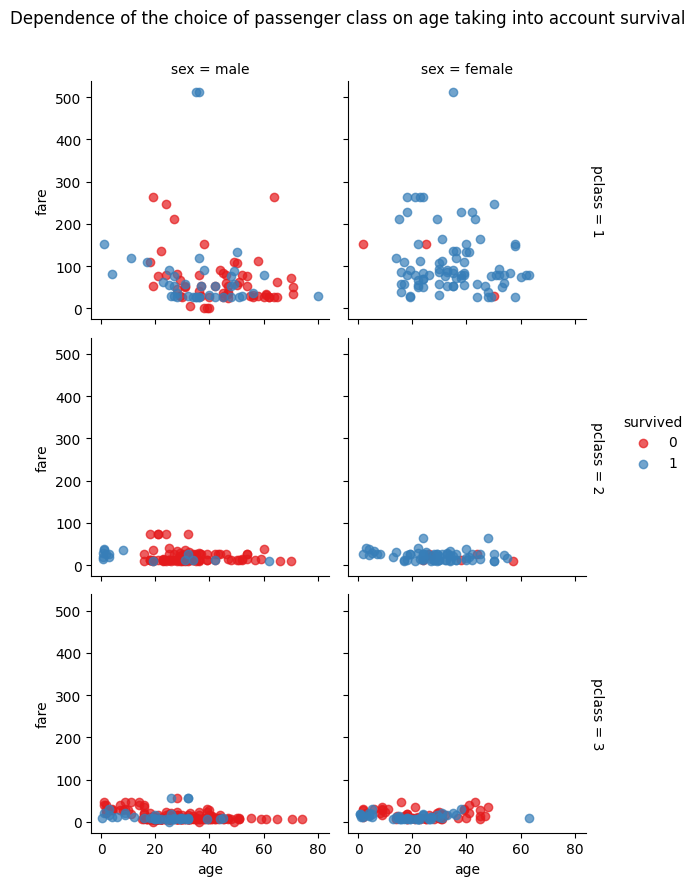

In [74]:
g = sns.FacetGrid(titanic_df, col='sex', row='pclass', hue='survived', palette='Set1', margin_titles=True)
g.map(plt.scatter, 'age', 'fare', alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dependence of the choice of passenger class on age taking into account survival')
plt.show()

Цей графік хоч і достатньо комплексний, але зрозумілий, з нього видно, що майже більшість жінок 2 та 3 класу вижили, тоді як серед жінок 3 класу вижило статистично набагато менше. З чоловіками такої прямої тенденції немає, хоча видно, що ті, хто купували найдорожчі квитки все-таки вижили

З цього графіку видно, що чим більший клас тим більша кількість точок зсуваєть в сторону більшого віку, також видно як мало дітей в 1 класі, тому думаю цю закономірність ми змогли спостерігати на обох графіках


# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

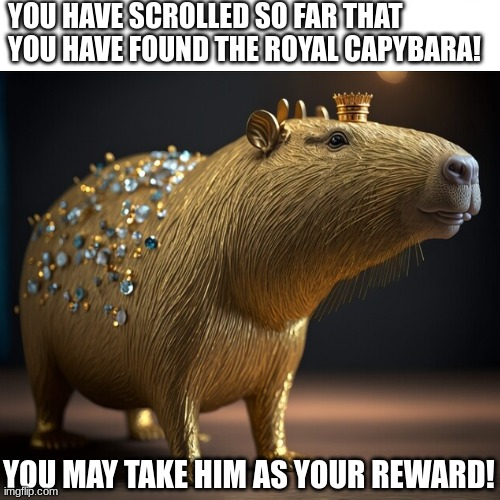